## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [150]:
import pandas as pd
from ydata_profiling import ProfileReport
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Ignoring all warnings
warnings.filterwarnings("ignore")

### Read Data

In [151]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

In [152]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [153]:
df.shape

(1205, 14)

### Generate Data Profiling Report

In [154]:
# Creating the profiling report
profile = ProfileReport(df, title="Profiling Report", explorative=True)
# Displaying the report in a Jupyter Notebook (optional)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

As we can see, data needs to be cleaned as it has 246 duplicate rows

In [155]:
# df_unique = df.drop_duplicates()
# #Reseting index
# df_unique.reset_index(drop=True, inplace=True)

In [156]:
# df_unique.duplicated().sum()

# Encoding

Choose a suitable encoding technique for the columns.

In [157]:
# Check the unique values in the ordinal columns
df_unique = df
unique_ages = df_unique['Age'].unique()
unique_financial_conditions = df_unique['Financial Condition'].unique()
unique_class_durations = df_unique['Class Duration'].unique()
unique_adaptivity_levels = df_unique['Adaptivity Level'].unique()

(unique_ages, unique_financial_conditions, unique_class_durations, unique_adaptivity_levels)

(array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5'], dtype=object),
 array(['Mid', 'Poor', 'Rich'], dtype=object),
 array(['3-6', '1-3', '0'], dtype=object),
 array(['Moderate', 'Low', 'High'], dtype=object))

In [158]:
#Adaptivity label will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df_unique['Adaptivity_Level_Ordinal'] = df_unique['Adaptivity Level'].map(ordinal_mapping)
df_unique.drop(columns=['Adaptivity Level'], inplace=True) #inplace Changes the original df
df_unique

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity_Level_Ordinal
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,2
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,2
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,2
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,2
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,1
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,2
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,2
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,1


In [159]:
#Education Level will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'School': 1, 'College': 2, 'University': 3}
df_unique['Education_Level_Ordinal'] = df_unique['Education Level'].map(ordinal_mapping)
df_unique.drop(columns=['Education Level'], inplace=True) #inplace Changes the original df
df_unique

,Gender,Age,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity_Level_Ordinal,Education_Level_Ordinal
0,Boy,21-25,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,2,3
1,Girl,21-25,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,2,3
2,Girl,16-20,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,2,2
3,Girl,11-15,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,2,1
4,Girl,16-20,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,1,2
1201,Girl,16-20,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,2,2
1202,Boy,11-15,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,2,1
1203,Girl,16-20,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,1,2


In [160]:
#Load-shedding will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'Low': 1,  'High': 2}
df_unique['Load-shedding_Ordinal'] = df_unique['Load-shedding'].map(ordinal_mapping)
df_unique.drop(columns=['Load-shedding'], inplace=True) #inplace Changes the original df
df_unique

,Gender,Age,Institution Type,IT Student,Location,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal
0,Boy,21-25,Non Government,No,Yes,Mid,Wifi,4G,3-6,No,Tab,2,3,1
1,Girl,21-25,Non Government,No,Yes,Mid,Mobile Data,4G,1-3,Yes,Mobile,2,3,2
2,Girl,16-20,Government,No,Yes,Mid,Wifi,4G,1-3,No,Mobile,2,2,1
3,Girl,11-15,Non Government,No,Yes,Mid,Mobile Data,4G,1-3,No,Mobile,2,1,1
4,Girl,16-20,Non Government,No,Yes,Poor,Mobile Data,3G,0,No,Mobile,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,Non Government,No,Yes,Mid,Wifi,4G,1-3,No,Mobile,1,2,1
1201,Girl,16-20,Non Government,No,No,Mid,Wifi,4G,3-6,No,Mobile,2,2,2
1202,Boy,11-15,Non Government,No,Yes,Mid,Mobile Data,3G,1-3,No,Mobile,2,1,1
1203,Girl,16-20,Non Government,No,No,Mid,Wifi,4G,1-3,No,Mobile,1,2,1


In [161]:
#Financial Condition will be ordinally encoded as it depicts meaningful order
ordinal_mapping = {'Poor': 1, 'Mid': 2, 'Rich': 3}
df_unique['Financial_Condition_Ordinal'] = df_unique['Financial Condition'].map(ordinal_mapping)
df_unique.drop(columns=['Financial Condition'], inplace=True) #inplace Changes the original df
df_unique

,Gender,Age,Institution Type,IT Student,Location,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal,Financial_Condition_Ordinal
0,Boy,21-25,Non Government,No,Yes,Wifi,4G,3-6,No,Tab,2,3,1,2
1,Girl,21-25,Non Government,No,Yes,Mobile Data,4G,1-3,Yes,Mobile,2,3,2,2
2,Girl,16-20,Government,No,Yes,Wifi,4G,1-3,No,Mobile,2,2,1,2
3,Girl,11-15,Non Government,No,Yes,Mobile Data,4G,1-3,No,Mobile,2,1,1,2
4,Girl,16-20,Non Government,No,Yes,Mobile Data,3G,0,No,Mobile,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,Non Government,No,Yes,Wifi,4G,1-3,No,Mobile,1,2,1,2
1201,Girl,16-20,Non Government,No,No,Wifi,4G,3-6,No,Mobile,2,2,2,2
1202,Boy,11-15,Non Government,No,Yes,Mobile Data,3G,1-3,No,Mobile,2,1,1,2
1203,Girl,16-20,Non Government,No,No,Wifi,4G,1-3,No,Mobile,1,2,1,2


In [162]:
# Gender binary encoding
Gender_mapping = {'Boy': 1, 'Girl': 0}
df_unique['Gender_B_Encoded'] = df_unique['Gender'].map(Gender_mapping)

# Institution Type binary encoding
Institution_Type_mapping = {'Non Government': 1, 'Government': 0}
df_unique['InstituteType_B_Encoded'] = df_unique['Institution Type'].map(Institution_Type_mapping)

# IT Student binary encoding
IT_Student_mapping = {'No': 1, 'Yes': 0}
df_unique['ItStu_B_Encoded'] = df_unique['IT Student'].map(IT_Student_mapping)

# Location binary encoding
Location_mapping = {'No': 1, 'Yes': 0}
df_unique['Location_B_Encoded'] = df_unique['Location'].map(Location_mapping)

# Internet Type binary encoding
Internet_Type_mapping = {'Wifi': 1, 'Mobile Data': 0}
df_unique['InternetType_B_Encoded'] = df_unique['Internet Type'].map(Internet_Type_mapping)

# Self Lms binary encoding
Self_Lms_mapping = {'No': 1, 'Yes': 0}
df_unique['SelfLms_B_Encoded'] = df_unique['Self Lms'].map(Self_Lms_mapping)

df_unique.drop(['Gender','Institution Type','IT Student','Location','Internet Type','Self Lms'], axis=1, inplace=True)
df_unique

,Age,Network Type,Class Duration,Device,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal,Financial_Condition_Ordinal,Gender_B_Encoded,InstituteType_B_Encoded,ItStu_B_Encoded,Location_B_Encoded,InternetType_B_Encoded,SelfLms_B_Encoded
0,21-25,4G,3-6,Tab,2,3,1,2,1,1,1,0,1,1
1,21-25,4G,1-3,Mobile,2,3,2,2,0,1,1,0,0,0
2,16-20,4G,1-3,Mobile,2,2,1,2,0,0,1,0,1,1
3,11-15,4G,1-3,Mobile,2,1,1,2,0,1,1,0,0,1
4,16-20,3G,0,Mobile,1,1,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,16-20,4G,1-3,Mobile,1,2,1,2,0,1,1,0,1,1
1201,16-20,4G,3-6,Mobile,2,2,2,2,0,1,1,1,1,1
1202,11-15,3G,1-3,Mobile,2,1,1,2,1,1,1,0,0,1
1203,16-20,4G,1-3,Mobile,1,2,1,2,0,1,1,1,1,1


In [164]:
# Encoding the identified categorical features
df_encoded = pd.get_dummies(df_unique, columns=['Age','Network Type', 'Class Duration', 'Device'])
df_encoded

,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal,Financial_Condition_Ordinal,Gender_B_Encoded,InstituteType_B_Encoded,ItStu_B_Encoded,Location_B_Encoded,InternetType_B_Encoded,SelfLms_B_Encoded,...,Age_6-10,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Device_Computer,Device_Mobile,Device_Tab
0,2,3,1,2,1,1,1,0,1,1,...,False,False,False,True,False,False,True,False,False,True
1,2,3,2,2,0,1,1,0,0,0,...,False,False,False,True,False,True,False,False,True,False
2,2,2,1,2,0,0,1,0,1,1,...,False,False,False,True,False,True,False,False,True,False
3,2,1,1,2,0,1,1,0,0,1,...,False,False,False,True,False,True,False,False,True,False
4,1,1,1,1,0,1,1,0,0,1,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,1,2,0,1,1,0,1,1,...,False,False,False,True,False,True,False,False,True,False
1201,2,2,2,2,0,1,1,1,1,1,...,False,False,False,True,False,False,True,False,True,False
1202,2,1,1,2,1,1,1,0,0,1,...,False,False,True,False,False,True,False,False,True,False
1203,1,2,1,2,0,1,1,1,1,1,...,False,False,False,True,False,True,False,False,True,False


### Check distribution

In [165]:
df_encoded.describe()

,Adaptivity_Level_Ordinal,Education_Level_Ordinal,Load-shedding_Ordinal,Financial_Condition_Ordinal,Gender_B_Encoded,InstituteType_B_Encoded,ItStu_B_Encoded,Location_B_Encoded,InternetType_B_Encoded,SelfLms_B_Encoded
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,1.684647,1.938589,1.166805,1.869710,0.550207,0.682988,0.747718,0.224066,0.423237,0.825726
std,0.618221,0.902863,0.372956,0.504584,0.497679,0.465506,0.434503,0.417139,0.494277,0.379502
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


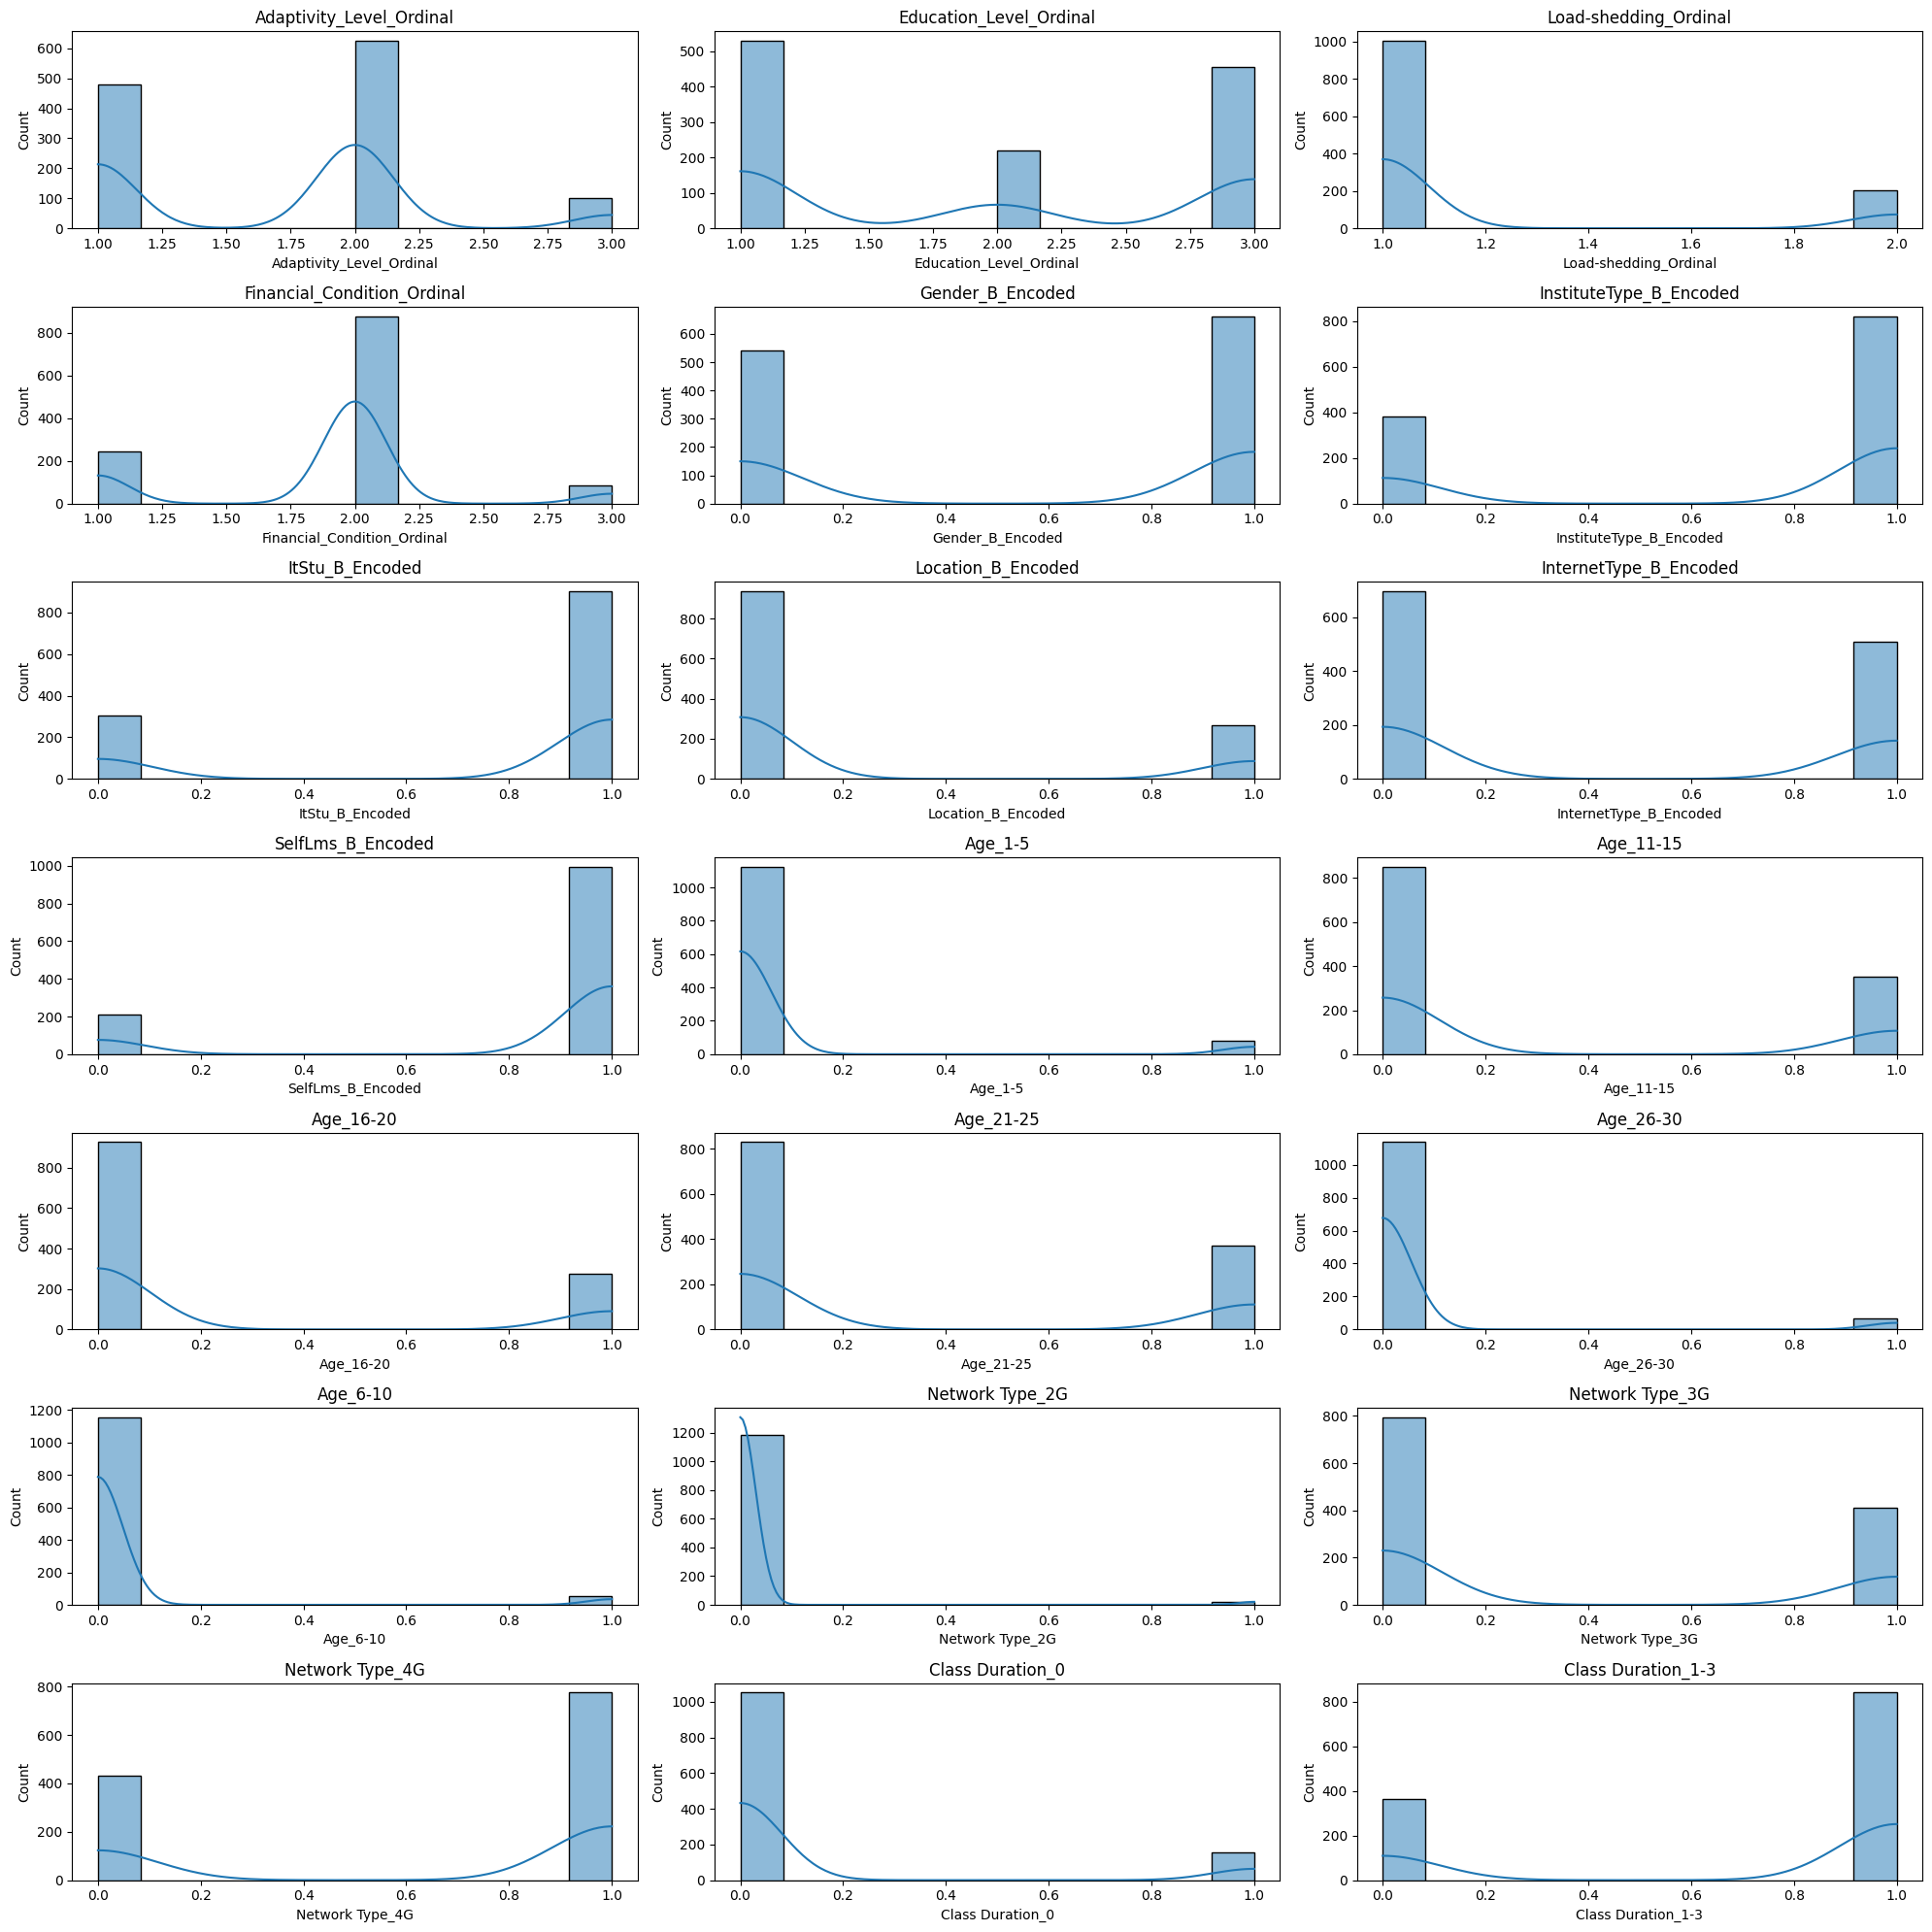

In [166]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 20))
columns = df_encoded.columns
index = 0

for i in range(7):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df_encoded[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index])
            index += 1

plt.tight_layout()
plt.show()

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [167]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = df_encoded.drop('Adaptivity_Level_Ordinal', axis=1)
y = df_encoded['Adaptivity_Level_Ordinal']

In [168]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Education_Level_Ordinal      1205 non-null   int64
 1   Load-shedding_Ordinal        1205 non-null   int64
 2   Financial_Condition_Ordinal  1205 non-null   int64
 3   Gender_B_Encoded             1205 non-null   int64
 4   InstituteType_B_Encoded      1205 non-null   int64
 5   ItStu_B_Encoded              1205 non-null   int64
 6   Location_B_Encoded           1205 non-null   int64
 7   InternetType_B_Encoded       1205 non-null   int64
 8   SelfLms_B_Encoded            1205 non-null   int64
 9   Age_1-5                      1205 non-null   bool 
 10  Age_11-15                    1205 non-null   bool 
 11  Age_16-20                    1205 non-null   bool 
 12  Age_21-25                    1205 non-null   bool 
 13  Age_26-30                    1205 non-null   boo

### Feature Scaling

Feature scaling is not required because categorical variables represent qualitative data rather than quantitative data

### Train Test Split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to apply KNN and evaluate
def evaluate_knn(n_neighbors, metric, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

#### Check different distance metric

**Euclidean**

In [171]:
# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(9, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)
print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)

Euclidean Accuracy: 0.7717842323651453
Euclidean Report:
               precision    recall  f1-score   support

           1       0.79      0.75      0.77       103
           2       0.76      0.83      0.80       115
           3       0.76      0.57      0.65        23

    accuracy                           0.77       241
   macro avg       0.77      0.72      0.74       241
weighted avg       0.77      0.77      0.77       241



In [185]:
# Applying KNN with Euclidean distance
euclidean_accuracy, euclidean_report = evaluate_knn(10, 'euclidean', X_train_scaled, y_train, X_test_scaled, y_test)

print("Euclidean Accuracy:", euclidean_accuracy)
print("Euclidean Report:\n", euclidean_report)

Euclidean Accuracy: 0.7883817427385892
Euclidean Report:
               precision    recall  f1-score   support

           1       0.80      0.79      0.79       103
           2       0.78      0.84      0.81       115
           3       0.75      0.52      0.62        23

    accuracy                           0.79       241
   macro avg       0.78      0.72      0.74       241
weighted avg       0.79      0.79      0.79       241



Minimum error:- 0.0912863070539419 at K = 0


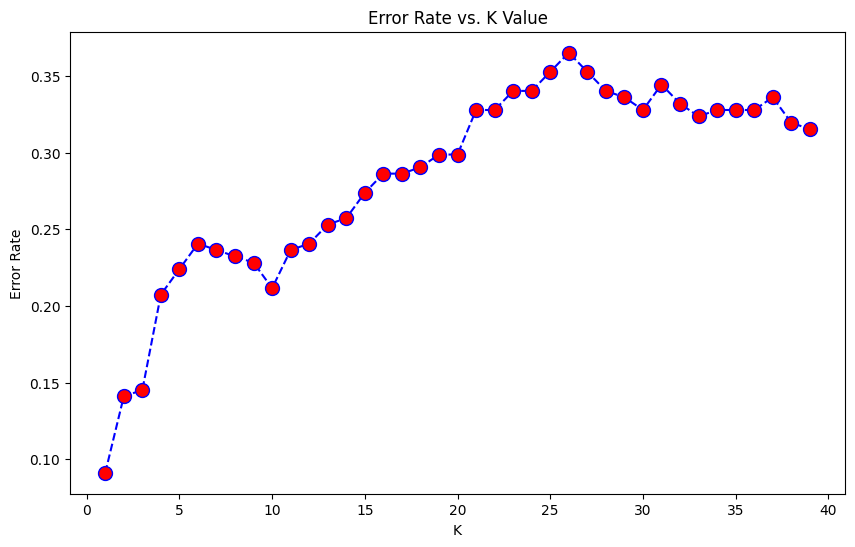

In [187]:
#Hyperparameter Tuning
import numpy as np
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_scaled,y_train)
 pred_i = knn.predict(X_test_scaled)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

With 17 nearest neighbours, this model is giving max accuracy

**Manhattan**

In [173]:
# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(9, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Manhattan Accuracy: 0.7593360995850622
Manhattan Report:
               precision    recall  f1-score   support

           1       0.78      0.70      0.74       103
           2       0.73      0.84      0.79       115
           3       0.82      0.61      0.70        23

    accuracy                           0.76       241
   macro avg       0.78      0.72      0.74       241
weighted avg       0.76      0.76      0.76       241



In [174]:
# Applying KNN with Manhattan distance
manhattan_accuracy, manhattan_report = evaluate_knn(17, 'manhattan', X_train_scaled, y_train, X_test_scaled, y_test)

print("Manhattan Accuracy:", manhattan_accuracy)
print("Manhattan Report:\n", manhattan_report)

Manhattan Accuracy: 0.6846473029045643
Manhattan Report:
               precision    recall  f1-score   support

           1       0.75      0.67      0.71       103
           2       0.65      0.78      0.71       115
           3       0.60      0.26      0.36        23

    accuracy                           0.68       241
   macro avg       0.67      0.57      0.59       241
weighted avg       0.69      0.68      0.68       241



# Decision Tree

**Using Entropy**

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [176]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

**Use Gini Index**

In [177]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [178]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.9045643153526971, 0.8879668049792531)

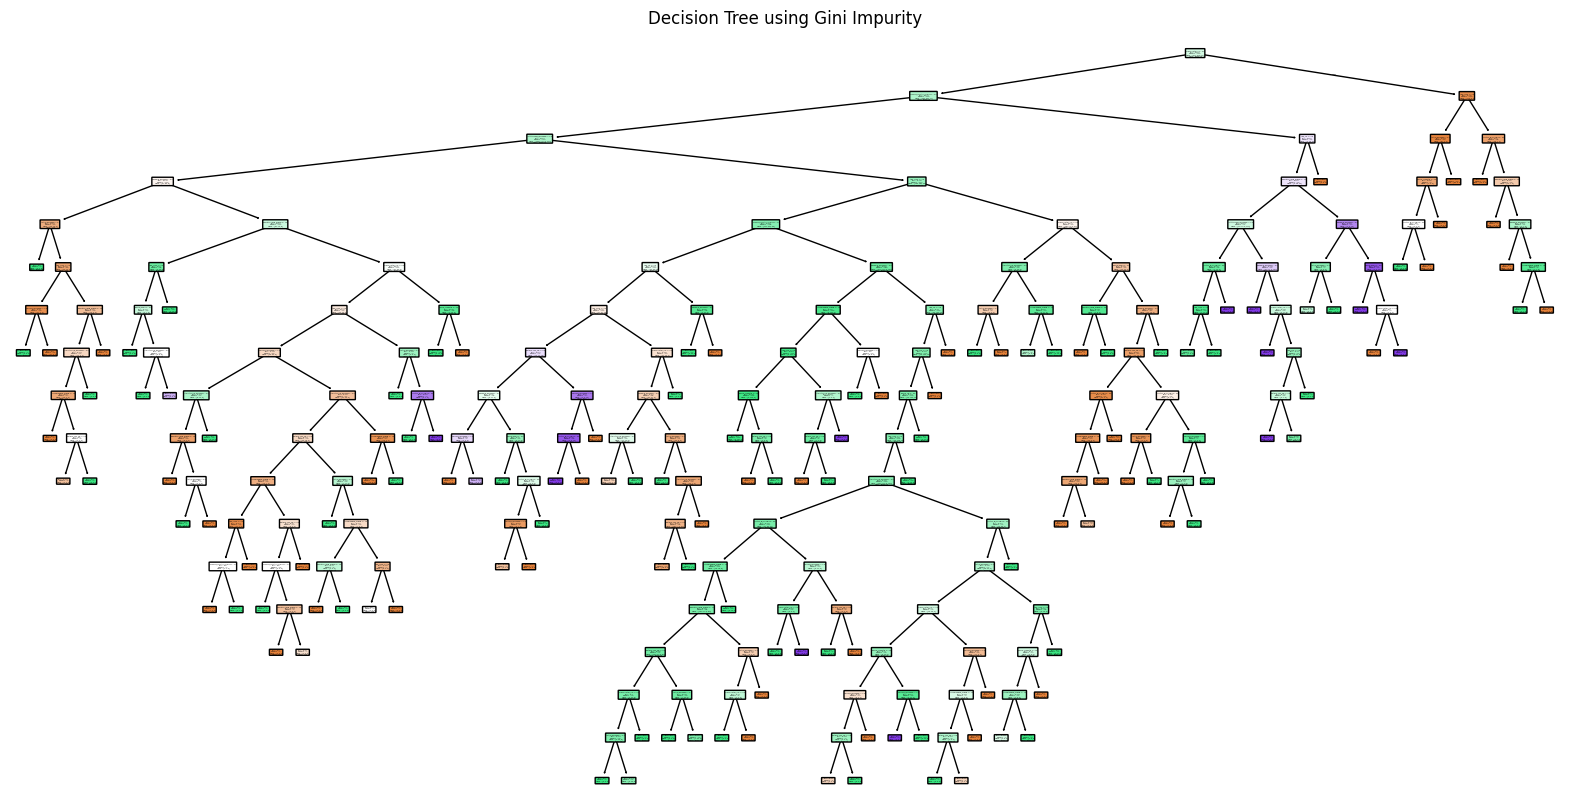

In [179]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Visualizing the Decision Tree using Gini impurity
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['Low', 'Moderate','High'], rounded=True)
plt.title("Decision Tree using Gini Impurity")
plt.show()
plt.close()

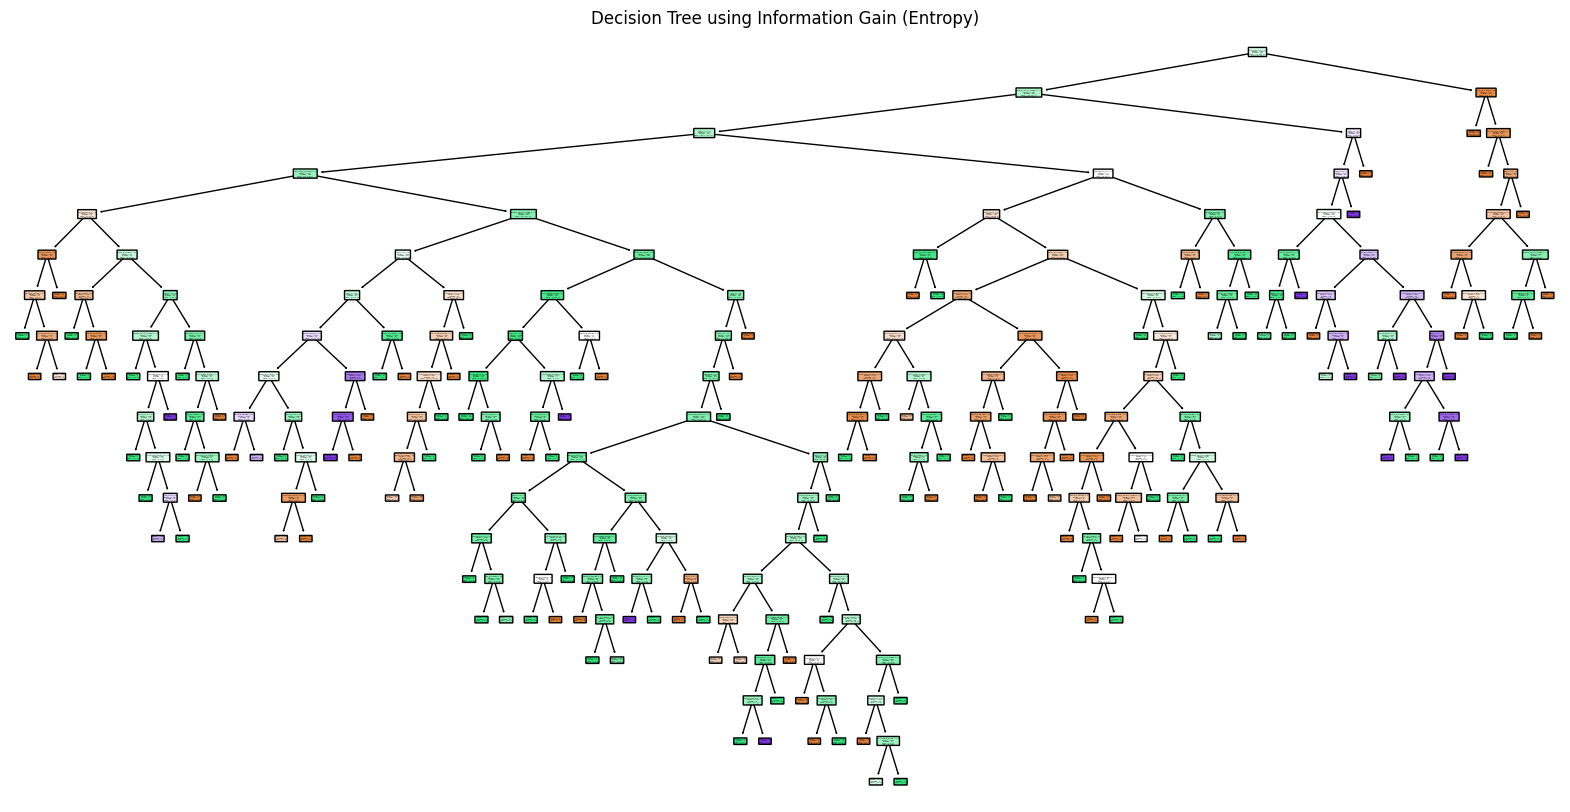

In [180]:
# Visualizing the Decision Tree using Information Gain (Entropy)
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['Low', 'Moderate','High'], rounded=True)
plt.title("Decision Tree using Information Gain (Entropy)")
plt.show()
plt.close()

The Decision Tree models have been successfully applied to dataset using both Gini impurity and Information Gain (Entropy) as criteria. Here are the results:

Decision Tree with Gini Impurity Criterion:
Accuracy on the test set: Approximately 90%

Decision Tree with Information Gain (Entropy) Criterion:
Accuracy on the test set: Approximately 88%